In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib as plt
import gradio as gr  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv("../career-recommendation-system/Dataset/mldata.csv")

/home/juniorortiz/Desktop/pierre/Data Science/career-recommendation-system/virtualenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(data.shape)

(6901, 20)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

In [4]:
print("List of numerical features: \n", data.select_dtypes(include="int").columns.tolist())  
print("List of categorical features: \n", data.select_dtypes(include="object").columns.tolist())

List of numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']
List of categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


In [5]:
data.isnull().sum()

Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
reading and writing skills             0
memory capability score                0
Interested subjects                    0
interested career area                 0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
Interested Type of Books               0
Management or Technical                0
hard/smart worker                      0
worked in teams ever?                  0
Introvert                              0
Suggested Job Role                     0
dtype: int64

In [6]:
categorical_cols = data[['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']]
numerical_cols = data[['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']]

for i in categorical_cols:
    print(data[i].value_counts(), end="\n\n")

self-learning capability?
yes    3496
no     3405
Name: count, dtype: int64

Extra-courses did
no     3529
yes    3372
Name: count, dtype: int64

certifications
r programming           803
information security    785
shell programming       783
machine learning        783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: count, dtype: int64

workshops
database security    897
system designing     891
web technologies     891
hacking              867
testing              852
data science         842
game development     831
cloud computing      830
Name: count, dtype: int64

reading and writing skills
excellent    2328
medium       2315
poor         2258
Name: count, dtype: int64

memory capability score
medium       2317
excellent    2303
poor         2281
Name: count, dtype: int64

Interested subjects
Software Engineering     731
IOT                      722
cloud computing          721
pro

In [7]:
for j in numerical_cols:
    print(data[j].value_counts(), end="\n\n")

Logical quotient rating
6    799
9    784
2    782
5    773
3    772
4    759
1    756
7    752
8    724
Name: count, dtype: int64

hackathons
5    1033
2    1026
0    1010
6     989
3     966
1     952
4     925
Name: count, dtype: int64

coding skills rating
4    787
5    777
2    776
6    774
8    767
7    766
9    761
3    755
1    738
Name: count, dtype: int64

public speaking points
7    807
1    799
8    777
2    770
3    766
4    760
9    758
6    740
5    724
Name: count, dtype: int64



In [8]:
sns.set_theme(style="darkgrid")
Palette = sns.color_palette("pastel")
Palette


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

/tmp/ipykernel_106887/4210140923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( data["Suggested Job Role"], palette=sns.color_palette("pastel"))
/tmp/ipykernel_106887/4210140923.py:3: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot( data["Suggested Job Role"], palette=sns.color_palette("pastel"))


<Axes: xlabel='count', ylabel='Suggested Job Role'>

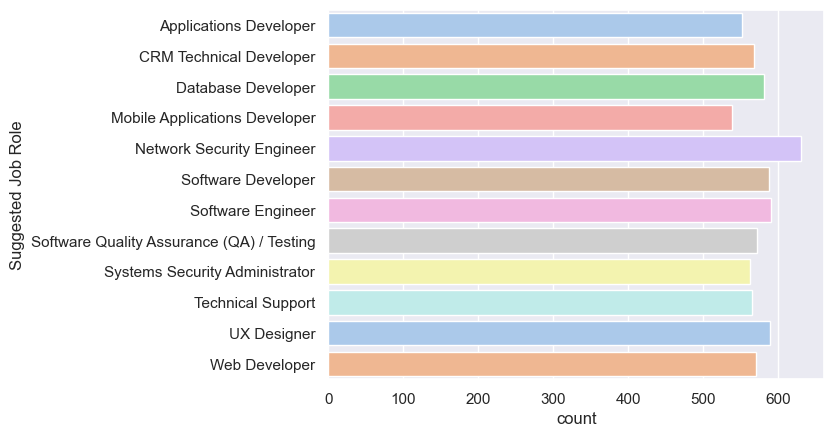

In [9]:
# We check for balancy for the label attribute, since this recommendation system 
# is similar classification model, therefore, it is a must to balance the label attribute
sns.countplot( data["Suggested Job Role"], palette=sns.color_palette("pastel"))

<Axes: >

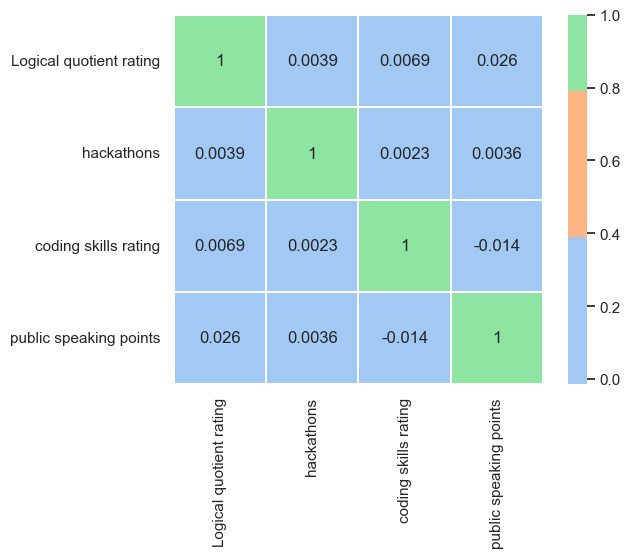

In [10]:
corr = data[['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']].corr() 
sns.heatmap(corr,square=True,annot=True,linewidth = .2,center=2,cmap=Palette)

In [11]:
print(data.T.head(4).T)

     Logical quotient rating hackathons coding skills rating  \
0                          5          0                    6   
1                          7          6                    4   
2                          2          3                    9   
3                          2          6                    3   
4                          2          0                    3   
...                      ...        ...                  ...   
6896                       7          5                    6   
6897                       6          5                    1   
6898                       5          1                    6   
6899                       1          6                    4   
6900                       5          6                    2   

     public speaking points  
0                         2  
1                         3  
2                         1  
3                         5  
4                         4  
...                     ...  
6896                 

In [12]:
# Now we understand there are 4 numerical values, 16 categorical values (nominal or binary[Yes/No])
# Therefore, we need to split encoding as each of the question is different with answer option 
# For example, there are about 12 options (will be encoded 0-11) in suggested job role vs yes/no question that will be only (0/1)
# Hence, we will proceed with Binary Encoding, then nominal encoding (Ordinal/ Label encoding)
# Call Categorical variables for referring and columns name to copy and paste:
print(categorical_cols.columns.tolist())
print(categorical_cols)

['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']
     self-learning capability? Extra-courses did        certifications  \
0                          yes                no  information security   
1                           no               yes     shell programming   
2                           no               yes  information security   
3                           no               yes         r programming   
4                          yes                no         distro making   
...                        ...               ...                   ...   
6896                       yes                no     shell programming   
6897  

In [13]:
bicols = data[['self-learning capability?', 'Extra-courses did', 'Taken inputs from seniors or elders','worked in teams ever?', 'Introvert']]
for i in bicols:
    replace_nums = {i: {"yes": 1 ,"no": 0}}
    data = data.replace(replace_nums )


/tmp/ipykernel_106887/2944769233.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(replace_nums )


In [14]:
orcols = data[["reading and writing skills", "memory capability score"]]
for i in orcols:
    replace_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    data = data.replace(replace_nums)

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   int64 
 5   Extra-courses did                    6901 non-null   int64 
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   int64 
 9   memory capability score              6901 non-null   int64 
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

/tmp/ipykernel_106887/625370112.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(replace_nums)


In [15]:
data.select_dtypes(include="object").columns.tolist()
nominalcols = ['certifications',
 'workshops',
 'Interested subjects',
 'interested career area ',
 'Type of company want to settle in?',
 'Interested Type of Books']
#Left with these nominal attributes
data.select_dtypes(include="object").head()
for i in nominalcols:
    data[i] = data[i].astype('category')
    data[i] = data[i].cat.codes

data = pd.get_dummies(data, columns = ['Management or Technical','hard/smart worker'])
data.head()


,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,worked in teams ever?,Introvert,Suggested Job Role,Management or Technical_Management,Management or Technical_Technical,hard/smart worker_hard worker,hard/smart worker_smart worker
0,5,0,6,2,1,0,4,6,0,0,...,0,0,28,1,0,Applications Developer,True,False,False,True
1,7,6,4,3,0,1,8,6,2,1,...,1,1,3,0,1,Applications Developer,False,True,True,False
2,2,3,9,1,0,1,4,6,2,0,...,9,1,29,0,0,Applications Developer,False,True,False,True
3,2,6,3,5,0,1,7,2,2,0,...,7,1,13,1,1,Applications Developer,True,False,False,True
4,2,0,3,4,1,0,1,3,2,1,...,0,0,14,1,0,Applications Developer,False,True,True,False


In [16]:
#done converting all to numerical left with the label attribute
#try with building machine learning model
dataset = data
dataset.head()
#Separate all independant variables and targeted variable column
df_train_x = dataset.drop('Suggested Job Role', axis = 1)
df_train_y = dataset['Suggested Job Role']
#Therefore, we split the dataset into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(df_train_x,df_train_y,test_size=.20,random_state=42)


In [17]:
#Proceed with random forest classifier
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train,y_train)
rf_predict_y = rf.predict(x_test)
rfc_cm = confusion_matrix(y_test,rf_predict_y)
rfc_acc = accuracy_score(y_test,rf_predict_y)
print(rfc_cm, end="\n\n")
print(rfc_acc*10)


[[ 8 14 10  6 15  4 11 16 11  9 13 15]
 [ 9 14 13  9 10  8 10  6  4  5  9  8]
 [ 8 11 14  9 13  9 10  8 11 12  8 10]
 [ 7  5  7  9 11  7  9  8 10  6 10 11]
 [12 13  6  7 18 11  8 11  9  8  9  9]
 [ 7 13  9  6 14 12  9 13  9  8  4  9]
 [ 4 10 14  9 15 13 10  9  6  8 11  7]
 [ 7 11 15 10 12 13  6 10 10 11  7  6]
 [ 5 11 11  5 23 12  9  3  7  9 12  7]
 [ 5  8  8  7 14 15  8 10 13  6  6 11]
 [10 16 11  4 14 16 10  5 14  8  5  6]
 [ 7  8 10  8 10 16 12 12  6  8  5  7]]

0.8689355539464156


In [18]:
userdata = [['7','6','6','8','3','5','4', '4', '7', '3', '3', '6','8', 
                    '7','5','7','4','5','6','8','8']]

In [19]:
ynewclass = rf.predict(userdata)
ynew = rf.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Software Engineer']
Probabilities of all classes:  [[0.07 0.11 0.07 0.05 0.05 0.06 0.12 0.11 0.11 0.09 0.06 0.1 ]]
Probability of Predicted class :  0.12


/home/juniorortiz/Desktop/pierre/Data Science/career-recommendation-system/virtualenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/juniorortiz/Desktop/pierre/Data Science/career-recommendation-system/virtualenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
import pickle 
pickle.dump(rf, open('rfweights.pkl','wb'))